# 2.富士下山問題

# 3.富士山から下る

# データ

In [1]:
import numpy as np
import matplotlib.pyplot as plt

csv_path = "/Users/nobu/Downloads/mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
label = ["その地点の番号","緯度","経度","標高","地点０からの距離"]
label_array = np.array(label)
print(label_array)
print(fuji[0:5])
print(fuji[132:143])

['その地点の番号' '緯度' '経度' '標高' '地点０からの距離']
[[   0.         35.134141  139.132082    0.          0.      ]
 [   1.         35.135826  139.129202    0.        322.      ]
 [   2.         35.13751   139.126322    0.        644.      ]
 [   3.         35.139194  139.123441    0.        966.      ]
 [   4.         35.140878  139.12056     0.       1288.      ]]
[[  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]
 [  140.          35.369253   138.727674  3567.76     45110.      ]
 [  141.          35.370928   138.

## 【問題1】データの可視化

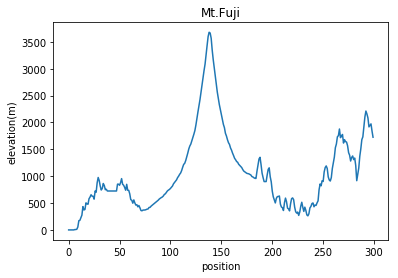

In [2]:
%matplotlib inline
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation(m)")
plt.plot(fuji[:,3])
plt.show()

## 【問題2】ある地点の勾配を計算する関数を作成

In [3]:
def grad(position):#今いる地点(position)と、その前の地点の勾配を求める関数
    
    x_difference = fuji[position,0] - fuji[position - 1,0]#ある地点の番号で差を求める
    y_difference = fuji[position,3] - fuji[position - 1,3]#ある地点の標高で差を求める
    gradient = y_difference/x_difference
    
    return gradient

gradient = grad(50)#grad(今いる地点)
print("答え")
print("今いる地点とその前の地点の勾配は、{}".format(gradient))

答え
今いる地点とその前の地点の勾配は、-20.360000000000014


## 【問題3】移動先の地点を計算する関数を作成

In [4]:
from decimal import Decimal, ROUND_HALF_UP#四捨五入するために使うパッケージ

def after_move(now_position,a):#移動後の地点を求める関数
    
    move_position = now_position - a*grad(now_position)#移動先の地点を計算
    move_position = Decimal(str(move_position))#四捨五入して出力したい変数をDecimal(str())で囲う
    move_position= move_position.quantize(Decimal("0"), rounding=ROUND_HALF_UP)#Decimal()には四捨五入したい桁数
    move_position = int(move_position)#intに変換※そのままだとclass 'decimal.Decimal'
    
    return move_position

move_position = after_move(100,0.2)#after_move(今いる地点,学習率)

if move_position <= 0:#次の地点がマイナスになったら0にする
    print("答え")
    print("移動先の地点は".format(0))
else:    
    print("答え")
    print("移動先の地点は{}".format(move_position))

答え
移動先の地点は96


## 【問題4】山を下る関数を作成

In [13]:
def down_mt(first_position,a):#山を降りていく過程を求める関数
    
    position_lst = [first_position]#最初の位置を追加
    grad_lst = [grad(first_position)]#最初の位置の勾配を追加
    
    while True:
        positions = after_move(position_lst[-1],a)#次の移動先を求める
        
        if position_lst[-1] == positions:
            
            break#条件式に当てはまったら抜ける = 山を下り切ったと仮定   

        position_lst.append(positions)#ループを抜けるまでリストに移動の過程を追加
        grad_lst.append(grad(position_lst[-1]))#移動の過程における各地点の勾配を追加
    
    return position_lst,grad_lst

position_lst,grad_lst = down_mt(136,0.2)#最初の位置と学習率を入力
print("答え")
print("山を下っていく過程での各地点xは{}".format(position_lst))

答え
山を下っていく過程での各地点xは[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


## 【問題5】下山過程の可視化

### 断面図

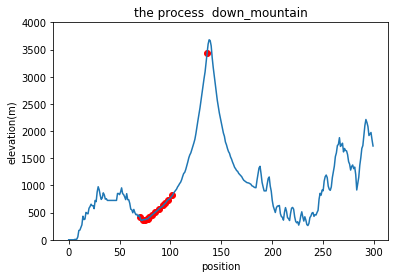

In [14]:
#降りていく過程に合わせた標高を追加したリストを作る
elevation_lst = []
for i in position_lst:
    elevation_lst.append(fuji[i,3])

%matplotlib inline
plt.title("the process  down_mountain")
plt.xlabel("position")
plt.ylabel("elevation(m)")
plt.plot(fuji[:,3])
plt.scatter(position_lst,elevation_lst,c = "red")
plt.ylim([0,4000])
plt.show()

### 標高の推移

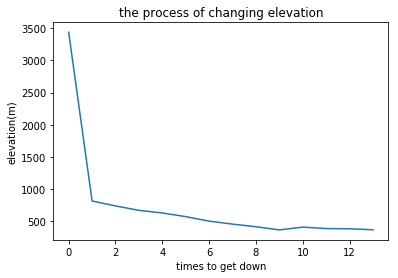

In [15]:
%matplotlib inline
plt.title("the process of changing elevation")
plt.ylabel("elevation(m)")
plt.xlabel(" times to get down ")
plt.plot(elevation_lst)
plt.show()

### 勾配の推移

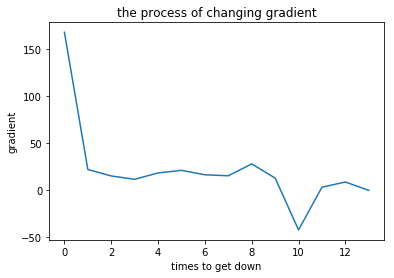

In [16]:
%matplotlib inline
plt.title("the process of changing gradient")
plt.ylabel("gradient")
plt.xlabel(" times to get down ")
plt.plot(grad_lst)
plt.show()

## 【問題6】初期値の変更

山を降る過程は[142, 172, 175, 176, 177, 179, 185]


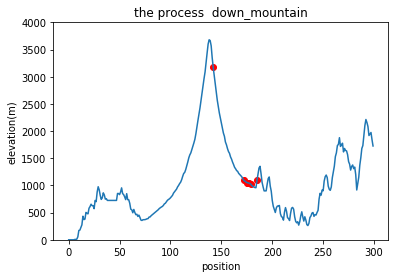

In [44]:
#富士山の頂上(139)より小さい地点だったら左に下る、大きい地点だったら右に下るように、関数３つを再定義

def grad(position):
    if position > 139:
        x_difference = fuji[position, 0] - fuji[position + 1, 0]  
        y_difference = fuji[position, 3] - fuji[position + 1, 3]#頂上より右ならある地点の１つ右の勾配を
    elif position <= 139:
        x_difference = fuji[position, 0] - fuji[position - 1, 0]  
        y_difference = fuji[position, 3] - fuji[position - 1, 3]#頂上より左ならある地点の１つ左の勾配を

    gradient = y_difference/x_difference

    return gradient




def after_move(position,a):
    if position > 139:
        move_position = position + a * -(grad(position))#頂上より右なら右に進むように
    elif position <= 139:
        move_position = position - a * grad(position)#頂上より左なら左に進むように

    move_position = Decimal(str(move_position))  
    move_position = move_position.quantize(Decimal("0"), rounding=ROUND_HALF_UP)  
    move_position = int(move_position)

    return move_position




def down_mt(position,a):  
    position_lst = [position]  
    grad_lst = [grad(position)]  

#地点が変わらない or  地点が戻ったら山を下ったと定義
    while True:
        positions = after_move(position_lst[-1],a) 
        
        if position_lst[-1] == positions:#地点が変わらなくなったら抜ける
            break  
        elif positions <= 139 and position_lst[-1] < positions:#頂上より左スタートかつ、地点が戻ったら抜ける
            break
        elif positions > 139 and position_lst[-1] > positions:#頂上より右スタートかつ、地点が戻ったら抜ける
            break
        position_lst.append(positions)  # ループを抜けるまでリストに移動の過程を追加
        grad_lst.append(grad(position_lst[-1]))  # 移動の過程における各地点の勾配を追加

    return position_lst,grad_lst





position_lst,grad_lst = down_mt(142,0.2)#スタート地点と学習率を変更
print("山を降る過程は{}".format(position_lst))

elevation_lst = []
for i in position_lst:
    elevation_lst.append(fuji[i,3])#降りる過程の標高を追加

plt.title("the process  down_mountain")
plt.xlabel("position")
plt.ylabel("elevation(m)")
plt.plot(fuji[:,3])
plt.scatter(position_lst,elevation_lst,c = "red")
plt.ylim([0,4000])
plt.show()

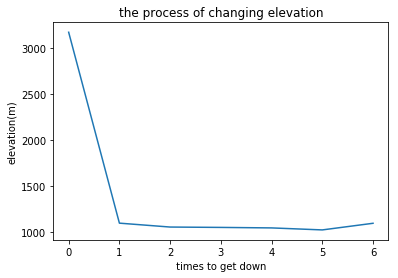

In [45]:
%matplotlib inline
plt.title("the process of changing elevation")
plt.ylabel("elevation(m)")
plt.xlabel(" times to get down ")
plt.plot(elevation_lst)
plt.show()

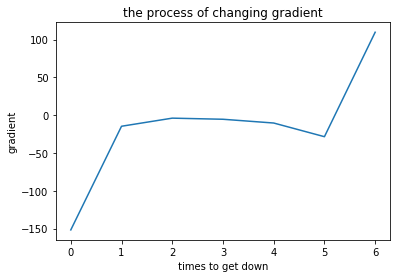

In [46]:
%matplotlib inline
plt.title("the process of changing gradient")
plt.ylabel("gradient")
plt.xlabel(" times to get down ")
plt.plot(grad_lst)
plt.show()

## 【問題7】（アドバンス問題）ハイパーパラメータの変更

#### α ＝ 0.01

山を降る過程は[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]


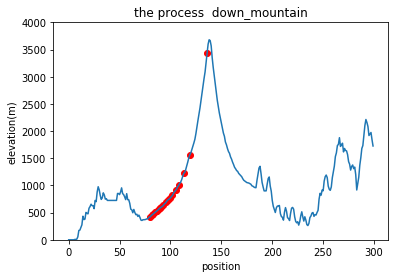

In [48]:
position_lst,grad_lst = down_mt(136,0.1)#スタート地点と学習率を変更
print("山を降る過程は{}".format(position_lst))

elevation_lst = []
for i in position_lst:
    elevation_lst.append(fuji[i,3])#降りる過程の標高を追加

plt.title("the process  down_mountain")
plt.xlabel("position")
plt.ylabel("elevation(m)")
plt.plot(fuji[:,3])
plt.scatter(position_lst,elevation_lst,c = "red")
plt.ylim([0,4000])
plt.show()

#### α ＝ 0.01

山を降る過程は[136, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120]


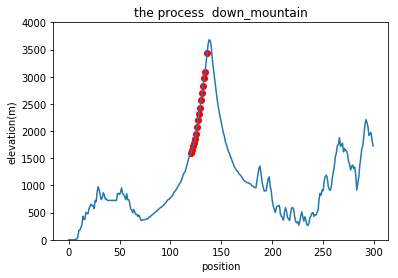

In [50]:
position_lst,grad_lst = down_mt(136,0.01)#スタート地点と学習率を変更
print("山を降る過程は{}".format(position_lst))

elevation_lst = []
for i in position_lst:
    elevation_lst.append(fuji[i,3])#降りる過程の標高を追加

plt.title("the process  down_mountain")
plt.xlabel("position")
plt.ylabel("elevation(m)")
plt.plot(fuji[:,3])
plt.scatter(position_lst,elevation_lst,c = "red")
plt.ylim([0,4000])
plt.show()